In [1]:
import pandas as pd
import os
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import shutil

In [2]:
today_energy_inv01_2020 = pd.read_csv("2020_today_energy_data.csv", index_col=[0])
temp_inv01_2020 = pd.read_csv("2020_temp_data.csv")
irr_wms01_2020 = pd.read_csv("2020_irradiance_data_wms01.csv")
temp_wms01_2020 = pd.read_csv("2020_temp_data_wms01.csv")

In [3]:
today_energy_inv01_2020.head()

,Date,Timestamp,Value,Signal
0,2020-01-01 00:32:00,1577818920000,0,Inv01_Today_Energy
1,2020-01-01 00:33:00,1577818980000,0,Inv01_Today_Energy
2,2020-01-01 08:24:00,1577847240000,0,Inv01_Today_Energy
3,2020-01-01 08:25:00,1577847300000,0,Inv01_Today_Energy
4,2020-01-01 08:26:00,1577847360000,0,Inv01_Today_Energy


In [4]:
today_energy_inv01_2020.rename(columns={"Value": "Inv01_Today_Energy"}, inplace=True)

In [5]:
inv01_2020 = today_energy_inv01_2020[((today_energy_inv01_2020[['Inv01_Today_Energy']] > 0)&(today_energy_inv01_2020[['Inv01_Today_Energy']] < 3000)).all(axis=1)]

In [6]:
inv01_2020['Inv01_Today_Energy'].describe()

count    190502.000000
mean       1057.132072
std         856.240251
min           1.000000
25%         233.000000
50%         934.000000
75%        1739.000000
max        2999.000000
Name: Inv01_Today_Energy, dtype: float64

In [7]:
inv01_2020 = inv01_2020.drop(['Signal'], axis=1)

In [8]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy
45785,2020-03-15 12:35:00,1584255900000,1
45786,2020-03-15 12:36:00,1584255960000,2
45787,2020-03-15 12:37:00,1584256020000,2
45788,2020-03-15 12:38:00,1584256080000,3
45789,2020-03-15 12:39:00,1584256140000,3


/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


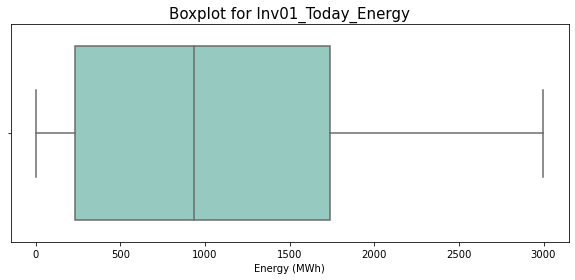

In [9]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Inv01_Today_Energy'], palette="Set3");
plt.title('Boxplot for Inv01_Today_Energy', fontsize = 15)
plt.xlabel('Energy (MWh)')
plt.show();

In [10]:
temp_inv01_2020.head()

,Unnamed: 0,Date,Timestamp,Value,Signal
0,0,2020-01-01 00:32:00,1577818920000,0,Inv01_Temp
1,1,2020-01-01 00:33:00,1577818980000,0,Inv01_Temp
2,2,2020-01-01 08:24:00,1577847240000,0,Inv01_Temp
3,3,2020-01-01 08:25:00,1577847300000,0,Inv01_Temp
4,4,2020-01-01 08:26:00,1577847360000,0,Inv01_Temp


In [11]:
temp_inv01_2020.loc[:, 'Value'] = temp_inv01_2020.Value.apply(lambda x: x/10)

In [12]:
temp_inv01_2020.rename(columns={"Value": "Inv01_Temp"}, inplace=True)

In [13]:
inv01_2020 = pd.merge(inv01_2020,
                 temp_inv01_2020[['Timestamp', 'Inv01_Temp']],
                 on='Timestamp')

In [14]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp
0,2020-03-15 12:35:00,1584255900000,1,33.8
1,2020-03-15 12:36:00,1584255960000,2,34.6
2,2020-03-15 12:37:00,1584256020000,2,35.4
3,2020-03-15 12:38:00,1584256080000,3,36.0
4,2020-03-15 12:39:00,1584256140000,3,36.7


In [15]:
irr_wms01_2020.head()

,Unnamed: 0,Date,Timestamp,Value,Signal
0,0,2020-01-01 00:32:00,1577818920000,0,Wms01_Irradiance
1,1,2020-01-01 08:24:00,1577847240000,0,Wms01_Irradiance
2,2,2020-01-01 08:25:00,1577847300000,203,Wms01_Irradiance
3,3,2020-01-01 08:26:00,1577847360000,163,Wms01_Irradiance
4,4,2020-01-01 08:27:00,1577847420000,160,Wms01_Irradiance


In [16]:
irr_wms01_2020.rename(columns={"Value": "Wms01_Irr"}, inplace=True)

In [17]:
inv01_2020 = pd.merge(inv01_2020,
                 irr_wms01_2020[['Timestamp', 'Wms01_Irr']],
                 on='Timestamp')

In [18]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr
0,2020-03-15 12:35:00,1584255900000,1,33.8,935
1,2020-03-15 12:36:00,1584255960000,2,34.6,944
2,2020-03-15 12:37:00,1584256020000,2,35.4,955
3,2020-03-15 12:38:00,1584256080000,3,36.0,948
4,2020-03-15 12:39:00,1584256140000,3,36.7,944


In [19]:
temp_wms01_2020.head()

,Unnamed: 0,Date,Timestamp,Value,Signal
0,0,2020-01-01 00:32:00,1577818920000,0,Wms01_Temp
1,1,2020-01-01 00:33:00,1577818980000,198,Wms01_Temp
2,2,2020-01-01 08:24:00,1577847240000,0,Wms01_Temp
3,3,2020-01-01 08:25:00,1577847300000,212,Wms01_Temp
4,4,2020-01-01 08:26:00,1577847360000,213,Wms01_Temp


In [20]:
temp_wms01_2020.loc[:, 'Value'] = temp_wms01_2020.Value.apply(lambda x: x/10)

In [21]:
temp_wms01_2020.rename(columns={"Value": "Wms01_Temp"}, inplace=True)

In [22]:
inv01_2020 = pd.merge(inv01_2020,
                 temp_wms01_2020[['Timestamp', 'Wms01_Temp']],
                 on='Timestamp')

In [23]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp
0,2020-03-15 12:35:00,1584255900000,1,33.8,935,36.9
1,2020-03-15 12:36:00,1584255960000,2,34.6,944,36.7
2,2020-03-15 12:37:00,1584256020000,2,35.4,955,36.6
3,2020-03-15 12:38:00,1584256080000,3,36.0,948,36.4
4,2020-03-15 12:39:00,1584256140000,3,36.7,944,36.7


In [24]:
inv01_2020

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp
0,2020-03-15 12:35:00,1584255900000,1,33.8,935,36.9
1,2020-03-15 12:36:00,1584255960000,2,34.6,944,36.7
2,2020-03-15 12:37:00,1584256020000,2,35.4,955,36.6
3,2020-03-15 12:38:00,1584256080000,3,36.0,948,36.4
4,2020-03-15 12:39:00,1584256140000,3,36.7,944,36.7
...,...,...,...,...,...,...
179823,2020-12-31 17:49:00,1609417140000,1285,46.1,4,22.7
179824,2020-12-31 17:50:00,1609417200000,1285,46.1,3,22.6
179825,2020-12-31 17:51:00,1609417260000,1285,46.1,2,22.6
179826,2020-12-31 17:52:00,1609417320000,1286,46.2,2,22.6


In [25]:
inv01_2020.loc[:, 'Date'] = pd.to_datetime(inv01_2020[['Date']].stack()).unstack()
inv01_2020.loc[:, 'Only_Date'] = inv01_2020.Date.apply(lambda x: str(x.date()))
inv01_2020.loc[:, 'Hour'] = inv01_2020.Date.apply(lambda x: int(str(x.time()).split(':')[0]))
inv01_2020.loc[:, 'Minute'] = inv01_2020.Date.apply(lambda x: int(str(x.time()).split(':')[1]))

In [26]:
def quarter(x):
    if x < 16:
        return 1
    elif x < 31:
        return 2
    elif x < 46:
        return 3
    else:
        return 4
        

In [27]:
inv01_2020.loc[:, 'Quarter'] = inv01_2020.Minute.apply(lambda x: quarter(x))

In [28]:
inv01_2020

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Only_Date,Hour,Minute,Quarter
0,2020-03-15 12:35:00,1584255900000,1,33.8,935,36.9,2020-03-15,12,35,3
1,2020-03-15 12:36:00,1584255960000,2,34.6,944,36.7,2020-03-15,12,36,3
2,2020-03-15 12:37:00,1584256020000,2,35.4,955,36.6,2020-03-15,12,37,3
3,2020-03-15 12:38:00,1584256080000,3,36.0,948,36.4,2020-03-15,12,38,3
4,2020-03-15 12:39:00,1584256140000,3,36.7,944,36.7,2020-03-15,12,39,3
...,...,...,...,...,...,...,...,...,...,...
179823,2020-12-31 17:49:00,1609417140000,1285,46.1,4,22.7,2020-12-31,17,49,4
179824,2020-12-31 17:50:00,1609417200000,1285,46.1,3,22.6,2020-12-31,17,50,4
179825,2020-12-31 17:51:00,1609417260000,1285,46.1,2,22.6,2020-12-31,17,51,4
179826,2020-12-31 17:52:00,1609417320000,1286,46.2,2,22.6,2020-12-31,17,52,4


In [29]:
inv01_2020.describe()

,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Hour,Minute,Quarter
count,1.798280e+05,179828.000000,179828.000000,179828.000000,179828.000000,179828.000000,179828.000000,179828.000000
mean,1.596968e+12,1006.612913,44.005213,432.796066,27.920643,11.825428,29.536641,2.452021
std,7.293902e+09,838.976196,32.363696,332.053183,15.621726,3.446428,17.239802,1.112253
min,1.584256e+12,1.000000,0.000000,0.000000,-3276.800000,6.000000,0.000000,1.000000
25%,1.590581e+12,211.000000,40.600000,150.000000,24.400000,9.000000,15.000000,1.000000
50%,1.596805e+12,871.000000,43.600000,362.000000,27.700000,12.000000,30.000000,2.000000
75%,1.603423e+12,1646.000000,47.000000,694.000000,31.100000,15.000000,44.000000,3.000000
max,1.609417e+12,2999.000000,6451.300000,16384.000000,2894.300000,22.000000,59.000000,4.000000


In [30]:
# inv01_2020.sort_values(by='Wms01_Temp', ascending=True).head(50)

In [31]:
inv01_2020 = inv01_2020[((inv01_2020[['Inv01_Temp']] > 20) & (inv01_2020[['Inv01_Temp']] < 55)).all(axis=1)]

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


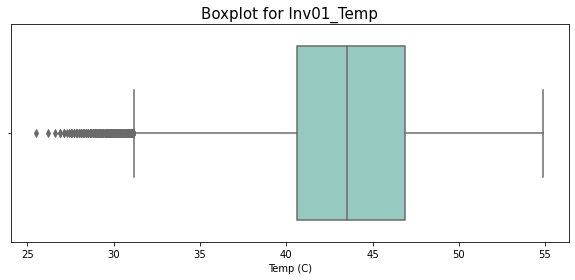

In [32]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Inv01_Temp'], palette="Set3");
plt.title('Boxplot for Inv01_Temp', fontsize = 15)
plt.xlabel('Temp (C)')
plt.show();

In [33]:
inv01_2020 = inv01_2020[((inv01_2020[['Wms01_Irr']] > 0) & (inv01_2020[['Wms01_Irr']] < 1500)).all(axis=1)]

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


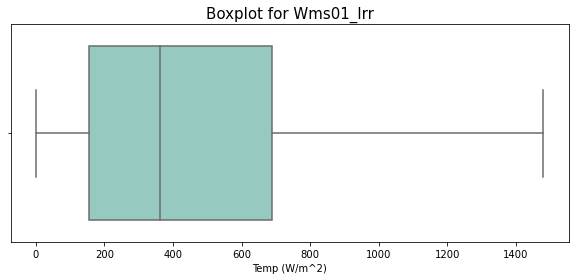

In [34]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Wms01_Irr'], palette="Set3");
plt.title('Boxplot for Wms01_Irr', fontsize = 15)
plt.xlabel('Temp (W/m^2)')
plt.show();

In [35]:
inv01_2020 = inv01_2020[((inv01_2020[['Wms01_Temp']] > 0)& (inv01_2020[['Wms01_Temp']] <50)).all(axis=1)]

/Users/qilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


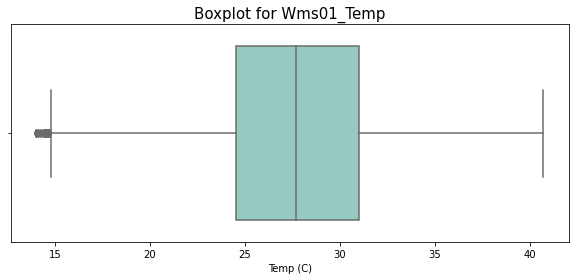

In [36]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.boxplot(inv01_2020['Wms01_Temp'], palette="Set3");
plt.title('Boxplot for Wms01_Temp', fontsize = 15)
plt.xlabel('Temp (C)')
plt.show();

In [37]:
inv01_2020

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Only_Date,Hour,Minute,Quarter
0,2020-03-15 12:35:00,1584255900000,1,33.8,935,36.9,2020-03-15,12,35,3
1,2020-03-15 12:36:00,1584255960000,2,34.6,944,36.7,2020-03-15,12,36,3
2,2020-03-15 12:37:00,1584256020000,2,35.4,955,36.6,2020-03-15,12,37,3
3,2020-03-15 12:38:00,1584256080000,3,36.0,948,36.4,2020-03-15,12,38,3
4,2020-03-15 12:39:00,1584256140000,3,36.7,944,36.7,2020-03-15,12,39,3
...,...,...,...,...,...,...,...,...,...,...
179823,2020-12-31 17:49:00,1609417140000,1285,46.1,4,22.7,2020-12-31,17,49,4
179824,2020-12-31 17:50:00,1609417200000,1285,46.1,3,22.6,2020-12-31,17,50,4
179825,2020-12-31 17:51:00,1609417260000,1285,46.1,2,22.6,2020-12-31,17,51,4
179826,2020-12-31 17:52:00,1609417320000,1286,46.2,2,22.6,2020-12-31,17,52,4


In [38]:
previous_energy = 0
realTimeEnergy = []

for row in inv01_2020.itertuples():
    if row.Inv01_Today_Energy >= previous_energy:
        realTimeEnergy.append(row.Inv01_Today_Energy-previous_energy)
        previous_energy = row.Inv01_Today_Energy 
    else:
        previous_energy = 0
        realTimeEnergy.append(row.Inv01_Today_Energy-previous_energy)
        previous_energy = row.Inv01_Today_Energy
        
        
        

In [39]:
len(realTimeEnergy)

176603

In [40]:
previous_timestamp = inv01_2020['Timestamp'][0]

timePast = []

for row in inv01_2020.itertuples():
    timePast.append((row.Timestamp-previous_timestamp)/60000)
    previous_timestamp = row.Timestamp


In [41]:
len(timePast)

176603

In [42]:
inv01_2020['Real_Time_Energy'] = realTimeEnergy
inv01_2020['Time_Past'] = timePast

In [43]:
inv01_2020

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Only_Date,Hour,Minute,Quarter,Real_Time_Energy,Time_Past
0,2020-03-15 12:35:00,1584255900000,1,33.8,935,36.9,2020-03-15,12,35,3,1,0.0
1,2020-03-15 12:36:00,1584255960000,2,34.6,944,36.7,2020-03-15,12,36,3,1,1.0
2,2020-03-15 12:37:00,1584256020000,2,35.4,955,36.6,2020-03-15,12,37,3,0,1.0
3,2020-03-15 12:38:00,1584256080000,3,36.0,948,36.4,2020-03-15,12,38,3,1,1.0
4,2020-03-15 12:39:00,1584256140000,3,36.7,944,36.7,2020-03-15,12,39,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179823,2020-12-31 17:49:00,1609417140000,1285,46.1,4,22.7,2020-12-31,17,49,4,0,1.0
179824,2020-12-31 17:50:00,1609417200000,1285,46.1,3,22.6,2020-12-31,17,50,4,0,1.0
179825,2020-12-31 17:51:00,1609417260000,1285,46.1,2,22.6,2020-12-31,17,51,4,0,1.0
179826,2020-12-31 17:52:00,1609417320000,1286,46.2,2,22.6,2020-12-31,17,52,4,1,1.0


In [44]:
inv01_2020['Date_Hour_Quarter'] = inv01_2020['Only_Date'].astype(str) + '_' + inv01_2020['Hour'].astype(str) + '_' + inv01_2020['Quarter'].astype(str)

In [45]:
inv01_2020.head()

,Date,Timestamp,Inv01_Today_Energy,Inv01_Temp,Wms01_Irr,Wms01_Temp,Only_Date,Hour,Minute,Quarter,Real_Time_Energy,Time_Past,Date_Hour_Quarter
0,2020-03-15 12:35:00,1584255900000,1,33.8,935,36.9,2020-03-15,12,35,3,1,0.0,2020-03-15_12_3
1,2020-03-15 12:36:00,1584255960000,2,34.6,944,36.7,2020-03-15,12,36,3,1,1.0,2020-03-15_12_3
2,2020-03-15 12:37:00,1584256020000,2,35.4,955,36.6,2020-03-15,12,37,3,0,1.0,2020-03-15_12_3
3,2020-03-15 12:38:00,1584256080000,3,36.0,948,36.4,2020-03-15,12,38,3,1,1.0,2020-03-15_12_3
4,2020-03-15 12:39:00,1584256140000,3,36.7,944,36.7,2020-03-15,12,39,3,0,1.0,2020-03-15_12_3


In [46]:
inv01_2020 = inv01_2020.drop(['Date', 'Timestamp', 'Only_Date', 'Hour', 'Minute', 'Quarter', 'Inv01_Today_Energy'], axis=1)

In [47]:
inv01_2020.head()

,Inv01_Temp,Wms01_Irr,Wms01_Temp,Real_Time_Energy,Time_Past,Date_Hour_Quarter
0,33.8,935,36.9,1,0.0,2020-03-15_12_3
1,34.6,944,36.7,1,1.0,2020-03-15_12_3
2,35.4,955,36.6,0,1.0,2020-03-15_12_3
3,36.0,948,36.4,1,1.0,2020-03-15_12_3
4,36.7,944,36.7,0,1.0,2020-03-15_12_3


In [48]:
agg_functions = {'Date_Hour_Quarter': 'first', 'Inv01_Temp': 'mean', 'Wms01_Irr': 'mean', 'Wms01_Temp': 'mean', 'Real_Time_Energy': 'sum', 'Time_Past': 'sum'}

#create new DataFrame by combining rows with same id values
inv01_2020 = inv01_2020.groupby(inv01_2020['Date_Hour_Quarter']).aggregate(agg_functions)


In [49]:
inv01_2020

,Date_Hour_Quarter,Inv01_Temp,Wms01_Irr,Wms01_Temp,Real_Time_Energy,Time_Past
Date_Hour_Quarter,,,,,,
2020-03-15_12_3,2020-03-15_12_3,36.981818,943.272727,36.909091,6,10.0
2020-03-15_12_4,2020-03-15_12_4,41.857143,939.785714,35.785714,8,14.0
2020-03-15_13_1,2020-03-15_13_1,45.118750,940.312500,35.012500,8,16.0
2020-03-15_13_2,2020-03-15_13_2,47.273333,928.466667,35.206667,8,15.0
2020-03-15_13_3,2020-03-15_13_3,48.640000,905.933333,35.460000,8,15.0
...,...,...,...,...,...,...
2020-12-31_8_4,2020-12-31_8_4,41.621429,68.714286,19.335714,8,14.0
2020-12-31_9_1,2020-12-31_9_1,42.287500,98.125000,19.406250,14,16.0
2020-12-31_9_2,2020-12-31_9_2,42.946667,166.066667,19.726667,22,15.0


In [50]:
inv01_2020['Avg_Energy'] = inv01_2020['Real_Time_Energy']/inv01_2020['Time_Past']

In [51]:
inv01_2020

,Date_Hour_Quarter,Inv01_Temp,Wms01_Irr,Wms01_Temp,Real_Time_Energy,Time_Past,Avg_Energy
Date_Hour_Quarter,,,,,,,
2020-03-15_12_3,2020-03-15_12_3,36.981818,943.272727,36.909091,6,10.0,0.600000
2020-03-15_12_4,2020-03-15_12_4,41.857143,939.785714,35.785714,8,14.0,0.571429
2020-03-15_13_1,2020-03-15_13_1,45.118750,940.312500,35.012500,8,16.0,0.500000
2020-03-15_13_2,2020-03-15_13_2,47.273333,928.466667,35.206667,8,15.0,0.533333
2020-03-15_13_3,2020-03-15_13_3,48.640000,905.933333,35.460000,8,15.0,0.533333
...,...,...,...,...,...,...,...
2020-12-31_8_4,2020-12-31_8_4,41.621429,68.714286,19.335714,8,14.0,0.571429
2020-12-31_9_1,2020-12-31_9_1,42.287500,98.125000,19.406250,14,16.0,0.875000
2020-12-31_9_2,2020-12-31_9_2,42.946667,166.066667,19.726667,22,15.0,1.466667


In [52]:
inv01_2020.loc[:, 'Date'] = inv01_2020.Date_Hour_Quarter.apply(lambda x: x.split('_')[0])
inv01_2020.loc[:, 'Hour'] = inv01_2020.Date_Hour_Quarter.apply(lambda x: x.split('_')[1])
inv01_2020.loc[:, 'Quarter'] = inv01_2020.Date_Hour_Quarter.apply(lambda x: x.split('_')[2])

In [53]:
inv01_2020 = inv01_2020.drop(['Date_Hour_Quarter', 'Real_Time_Energy', 'Time_Past'], axis=1)

In [54]:
inv01_2020

,Inv01_Temp,Wms01_Irr,Wms01_Temp,Avg_Energy,Date,Hour,Quarter
Date_Hour_Quarter,,,,,,,
2020-03-15_12_3,36.981818,943.272727,36.909091,0.600000,2020-03-15,12,3
2020-03-15_12_4,41.857143,939.785714,35.785714,0.571429,2020-03-15,12,4
2020-03-15_13_1,45.118750,940.312500,35.012500,0.500000,2020-03-15,13,1
2020-03-15_13_2,47.273333,928.466667,35.206667,0.533333,2020-03-15,13,2
2020-03-15_13_3,48.640000,905.933333,35.460000,0.533333,2020-03-15,13,3
...,...,...,...,...,...,...,...
2020-12-31_8_4,41.621429,68.714286,19.335714,0.571429,2020-12-31,8,4
2020-12-31_9_1,42.287500,98.125000,19.406250,0.875000,2020-12-31,9,1
2020-12-31_9_2,42.946667,166.066667,19.726667,1.466667,2020-12-31,9,2


In [55]:
inv01_2020.to_csv("inv01_2020.csv", index=False)